In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Função para criar o gráfico 3D
def plot_3d_function(function, bounds):
    x = np.linspace(bounds[0][0], bounds[0][1], 100)
    y = np.linspace(bounds[1][0], bounds[1][1], 100)
    X, Y = np.meshgrid(x, y)
    Z = function(np.array([X,Y]))

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis', alpha=.6)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('f(x1, x2)')
    plt.show()


In [3]:
# hill climbing
def hill_climbing(objective_function, bounds, x_initial, epsilon=0.1, max_iterations=10000, max=False):
    x_best = np.array(x_initial)
    f_best = objective_function(x_best)

    bounds = np.array(bounds)
    for i in range(max_iterations):
        # Gerar uma nova solução perturbando x_best e aplicando os bounds a cada dimensão
        y = np.clip(x_best + np.random.uniform(-epsilon, epsilon, size=len(x_best)), bounds[:, 0], bounds[:, 1])
        f_y = objective_function(y)

        if max:
            if f_y > f_best:
                x_best, f_best = y, f_y
        else:
            if f_y < f_best:
                x_best, f_best = y, f_y

    return x_best, f_best

In [4]:
# Local Random Search (LRS)
def local_random_search(objective_function, bounds, sigma=0.1, max_iterations=10000, max=False):
    # Inicializar com uma solução aleatória dentro dos bounds
    bounds = np.array(bounds)
    x_best = np.random.uniform(bounds[:, 0], bounds[:, 1], size=len(bounds))
    f_best = objective_function(x_best)

    for i in range(max_iterations):
        # Perturbação com distribuição normal
        y = np.clip(x_best + np.random.normal(0, sigma, size=len(x_best)), bounds[:, 0], bounds[:, 1])
        f_y = objective_function(y)

        if max:
            if f_y > f_best:
                x_best, f_best = y, f_y
        else:
            if f_y < f_best:
                x_best, f_best = y, f_y

    return x_best, f_best

In [5]:
# Global Random Search (GRS)
def global_random_search(objective_function, bounds, max_iterations=10000, max=False):
    bounds = np.array(bounds)
    # Inicializar com uma solução aleatória dentro dos bounds
    x_best = np.random.uniform(bounds[:, 0], bounds[:, 1], size=len(bounds))
    f_best = objective_function(x_best)

    for i in range(max_iterations):
        # Gerar uma nova solução aleatória
        y = np.random.uniform(bounds[:, 0], bounds[:, 1], size=len(x_best))
        f_y = objective_function(y)

        if max:
            if f_y > f_best:
                x_best, f_best = y, f_y
        else:
            if f_y < f_best:
                x_best, f_best = y, f_y

    return x_best, f_best

In [6]:
# Função para executar os algoritmos de otimização e armazenar os resultados
def run_experiment(objective_function, bounds, x_initial, maximize=False, num_iterations=100):
    if maximize:
        operation = "Valor Máximo"
    else:
        operation = "Valor Mínimo"

    results = {"Algoritmo": [], "Solução": [], operation: []}

    for _ in range(num_iterations):
        # Hill Climbing
        hill_result = hill_climbing(objective_function, bounds, x_initial, max=maximize)
        results["Algoritmo"].append("Hill Climbing")
        results["Solução"].append(hill_result[0])
        results[operation].append(round(hill_result[1], 3))  # Armazenar o valor sem inverter o sinal

        # Local Random Search
        lrs_result = local_random_search(objective_function, bounds, max=maximize)
        results["Algoritmo"].append("Local Random Search")
        results["Solução"].append(lrs_result[0])
        results[operation].append(round(lrs_result[1], 3))  # Armazenar o valor sem inverter o sinal

        # Global Random Search
        grs_result = global_random_search(objective_function, bounds, max=maximize)
        results["Algoritmo"].append("Global Random Search")
        results["Solução"].append(grs_result[0])
        results[operation].append(round(grs_result[1], 3))  # Armazenar o valor sem inverter o sinal

    # Converter resultados para um DataFrame
    df_results = pd.DataFrame(results)

    # Exibir a moda (solução mais frequente) para cada algoritmo
    moda_hill = df_results[df_results["Algoritmo"] == "Hill Climbing"][operation].mode()[0]
    moda_lrs = df_results[df_results["Algoritmo"] == "Local Random Search"][operation].mode()[0]
    moda_grs = df_results[df_results["Algoritmo"] == "Global Random Search"][operation].mode()[0]

    print(f"Moda Hill Climbing: {moda_hill}")
    print(f"Moda Local Random Search: {moda_lrs}")
    print(f"Moda Global Random Search: {moda_grs}")

    return df_results

Imprimindo Solução unitária: 
Hill Climbing: [0 0] 0
Local Random Search: [-0.00076974  0.00111051] 0.0
Global Random Search: [-0.42387044  1.73681667] 3.196


Realizando testes com 100 iterações...


Moda Hill Climbing: 0.0
Moda Local Random Search: 0.0
Moda Global Random Search: 0.777


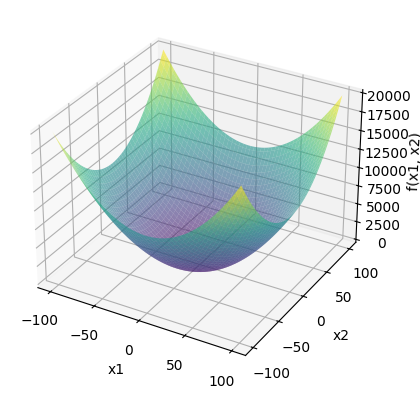

In [7]:
# minimize
def f(x):
  x1, x2 = x
  return x1**2 + x2**2

bounds = [(-100, 100), (-100, 100)]

x_initial = np.array([0, 0])

# Hill Climbing
best_solution_hc, best_value_hc = hill_climbing(f, bounds, x_initial)

# Busca Local Aleatória
best_solution_lrs, best_value_lrs = local_random_search(f, bounds)

# Busca Aleatória Global
best_solution_grs, best_value_grs = global_random_search(f, bounds)

print("Imprimindo Solução unitária: ")
print("Hill Climbing:", best_solution_hc, round(best_value_hc, 3))
print("Local Random Search:", best_solution_lrs, round(best_value_lrs, 3))
print("Global Random Search:", best_solution_grs, round(best_value_grs, 3))
print("\n")
print("Realizando testes com 100 iterações...")
print("\n")
run_experiment(f, bounds, x_initial)

plot_3d_function(f, bounds)

Imprimindo Solução unitária: 
Hill Climbing: [0.01158599 0.01206864] 1.006
Local Random Search: [1.69717521 1.69703673] 2.003
Global Random Search: [1.68149868 1.69463862] 2.003


Realizando testes com 100 iterações...


Moda Hill Climbing: 1.006
Moda Local Random Search: 2.003
Moda Global Random Search: 2.002


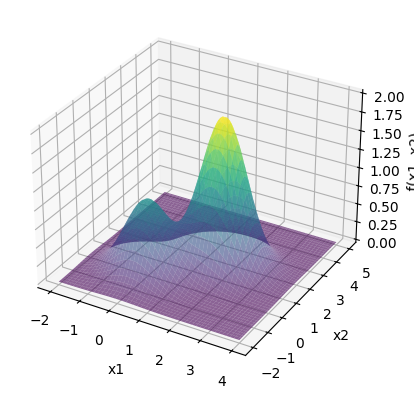

In [8]:
# maximize
def f(x):
  x1, x2 = x
  return np.exp(-(x1**2 + x2**2)) + 2 * np.exp(-((x1 - 1.7)**2 + (x2 - 1.7)**2))

# Define the bounds
bounds = [(-2, 4), (-2, 5)]

# Define the initial guess
x_initial = np.array([0, 0])

# Hill Climbing
best_solution_hc, best_value_hc = hill_climbing(f, bounds, x_initial, max=True)

# Busca Local Aleatória
best_solution_lrs, best_value_lrs = local_random_search(f, bounds, max=True)

# Busca Aleatória Global
best_solution_grs, best_value_grs = global_random_search(f, bounds, max=True)

print("Imprimindo Solução unitária: ")
print("Hill Climbing:", best_solution_hc, round(best_value_hc, 3))
print("Local Random Search:", best_solution_lrs, round(best_value_lrs, 3))
print("Global Random Search:", best_solution_grs, round(best_value_grs, 3))
print("\n")
print("Realizando testes com 100 iterações...")
print("\n")
run_experiment(f, bounds, x_initial, maximize=True)

plot_3d_function(f, bounds)

Imprimindo Solução unitária: 
Hill Climbing: [0 0] 2.35
Local Random Search: [-5.47623458  0.49775281] 10.826
Global Random Search: [ 0.44398833 -0.3835154 ] 1.991


Realizando testes com 100 iterações...


Moda Hill Climbing: 2.35
Moda Local Random Search: 1.841
Moda Global Random Search: 1.847


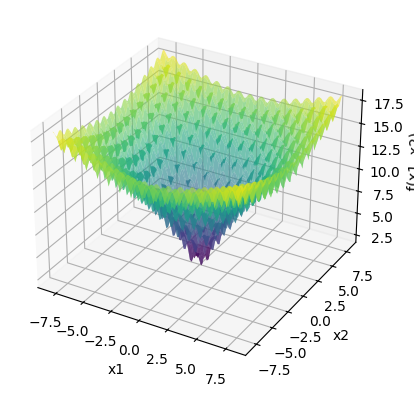

In [9]:
# minimize
def f(x):
    x1, x2 = x
    return -20 * np.exp(-0.2 * np.sqrt(0.5 * (x1**2 + x2**2))) - np.exp(-0.5 * (np.cos(2 * np.pi * x1) + np.cos(2 * np.pi * x2))) + 20 + np.exp(1)

bounds = [(-8, 8), (-8, 8)]

x_initial = np.array([0, 0])

# Hill Climbing
best_solution_hc, best_value_hc = hill_climbing(f, bounds, x_initial)

# Busca Local Aleatória
best_solution_lrs, best_value_lrs = local_random_search(f, bounds)

# Busca Aleatória Global
best_solution_grs, best_value_grs = global_random_search(f, bounds)

print("Imprimindo Solução unitária: ")
print("Hill Climbing:", best_solution_hc, round(best_value_hc, 3))
print("Local Random Search:", best_solution_lrs, round(best_value_lrs, 3))
print("Global Random Search:", best_solution_grs, round(best_value_grs, 3))
print("\n")
print("Realizando testes com 100 iterações...")
print("\n")
run_experiment(f, bounds, x_initial)

plot_3d_function(f, bounds)

Imprimindo Solução unitária: 
Hill Climbing: [0 0] 0.0
Local Random Search: [ 4.97501065 -3.97987395] 40.793
Global Random Search: [0.98907828 0.02592276] 1.135


Realizando testes com 100 iterações...


Moda Hill Climbing: 0.0
Moda Local Random Search: 16.914
Moda Global Random Search: 0.061


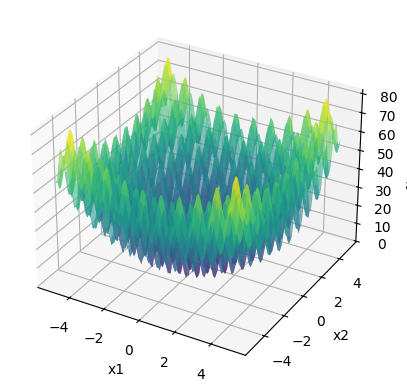

In [10]:
# minimize
def f(x):
  x1, x2 = x
  return (x1**2 - 10 * np.cos(2 * np.pi * x1) + 10) + (x2**2 - 10 * np.cos(2 * np.pi * x2) + 10)

# Define the bounds
bounds = [(-5.12, 5.12), (-5.12, 5.12)]

# Define the initial guess
x_initial = np.array([0, 0])

# Hill Climbing
best_solution_hc, best_value_hc = hill_climbing(f, bounds, x_initial)

# Busca Local Aleatória
best_solution_lrs, best_value_lrs = local_random_search(f, bounds)

# Busca Aleatória Global
best_solution_grs, best_value_grs = global_random_search(f, bounds)

print("Imprimindo Solução unitária: ")
print("Hill Climbing:", best_solution_hc, round(best_value_hc, 3))
print("Local Random Search:", best_solution_lrs, round(best_value_lrs, 3))
print("Global Random Search:", best_solution_grs, round(best_value_grs, 3))
print("\n")
print("Realizando testes com 100 iterações...")
print("\n")
run_experiment(f, bounds, x_initial)

plot_3d_function(f, bounds)

Imprimindo Solução unitária: 
Hill Climbing: [0.99740501 1.00293638] 2.037
Local Random Search: [ -3.91038221 -10.        ] 0.532
Global Random Search: [0.95623818 1.0308509 ] 2.032


Realizando testes com 100 iterações...


Moda Hill Climbing: 2.037
Moda Local Random Search: 0.976
Moda Global Random Search: 2.02


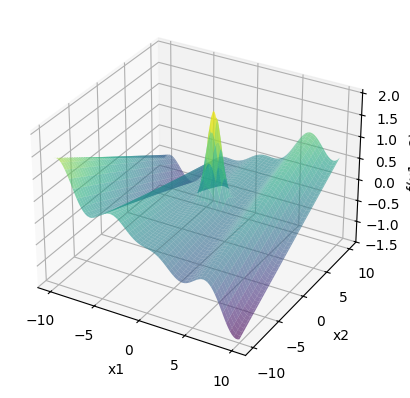

In [11]:

# maximize
def f(x):
  x1, x2 = x
  return ((x1 * np.cos(x1)) / 20 + 2 * np.exp(-(x1-1)**2 - (x2-1)**2) + 0.01 * x1 * x2)

# Define the bounds
bounds = [(-10, 10), (-10, 10)]

# Define the initial guess
x_initial = np.array([0, 0])

# Hill Climbing
best_solution_hc, best_value_hc = hill_climbing(f, bounds, x_initial, max=True)

# Busca Local Aleatória
best_solution_lrs, best_value_lrs = local_random_search(f, bounds, max=True)

# Busca Aleatória Global
best_solution_grs, best_value_grs = global_random_search(f, bounds, max=True)

print("Imprimindo Solução unitária: ")
print("Hill Climbing:", best_solution_hc, round(best_value_hc, 3))
print("Local Random Search:", best_solution_lrs, round(best_value_lrs, 3))
print("Global Random Search:", best_solution_grs, round(best_value_grs, 3))
print("\n")
print("Realizando testes com 100 iterações...")
print("\n")
run_experiment(f, bounds, x_initial, maximize=True)

plot_3d_function(f, bounds)

Imprimindo Solução unitária: 
Hill Climbing: [0 0] -1.0
Local Random Search: [-0.88384193  0.8810207 ] 0.757
Global Random Search: [2.87862162 2.87058179] 4.742


Realizando testes com 100 iterações...


Moda Hill Climbing: -1.0
Moda Local Random Search: 0.262
Moda Global Random Search: 4.706


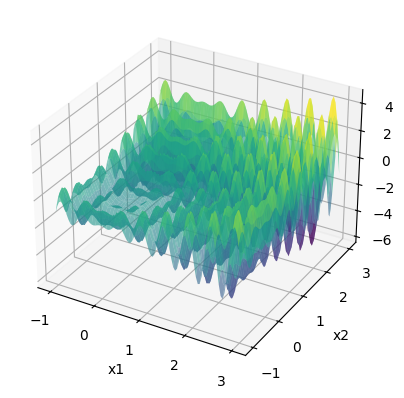

In [12]:

# maximize
def f(x):
  x1, x2 = x
  return -(x1 * np.sin(4 * np.pi * x1) - x2 * np.sin(4 * np.pi * x2 + np.pi) + 1)

# Define the bounds
bounds = [(-1, 3), (-1, 3)]

# Define the initial guess
x_initial = np.array([0, 0])

# Hill Climbing
best_solution_hc, best_value_hc = hill_climbing(f, bounds, x_initial, max=True)

# Busca Local Aleatória
best_solution_lrs, best_value_lrs = local_random_search(f, bounds, max=True)

# Busca Aleatória Global
best_solution_grs, best_value_grs = global_random_search(f, bounds, max=True)

print("Imprimindo Solução unitária: ")
print("Hill Climbing:", best_solution_hc, round(best_value_hc, 3))
print("Local Random Search:", best_solution_lrs, round(best_value_lrs, 3))
print("Global Random Search:", best_solution_grs, round(best_value_grs, 3))
print("\n")
print("Realizando testes com 100 iterações...")
print("\n")
run_experiment(f, bounds, x_initial, maximize=True)

plot_3d_function(f, bounds)

Imprimindo Solução unitária: 
Hill Climbing: [1.93778998 1.40216337] -1.912
Local Random Search: [1.93849304 2.04585955] -1.816
Global Random Search: [1.94538306 1.40175516] -1.912


Realizando testes com 100 iterações...


Moda Hill Climbing: -1.912
Moda Local Random Search: -1.912
Moda Global Random Search: -1.912


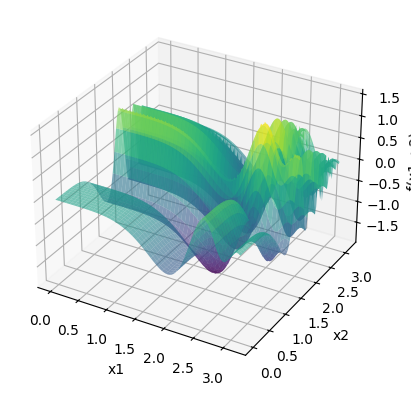

In [13]:
# min
def f(x):
  x1, x2 = x
  return -np.sin(x1) * np.sin((x1**2 / np.pi)**2.10) - np.sin(x2) * np.sin((2 * x2**2 / np.pi)**2.10)

# Define the bounds
bounds = [(0, np.pi), (0, np.pi)]

# Define the initial guess
x_initial = np.array([1, 1])

# Hill Climbing
best_solution_hc, best_value_hc = hill_climbing(f, bounds, x_initial)

# Busca Local Aleatória
best_solution_lrs, best_value_lrs = local_random_search(f, bounds)

# Busca Aleatória Global
best_solution_grs, best_value_grs = global_random_search(f, bounds)

print("Imprimindo Solução unitária: ")
print("Hill Climbing:", best_solution_hc, round(best_value_hc, 3))
print("Local Random Search:", best_solution_lrs, round(best_value_lrs, 3))
print("Global Random Search:", best_solution_grs, round(best_value_grs, 3))
print("\n")
print("Realizando testes com 100 iterações...")
print("\n")
run_experiment(f, bounds, x_initial)

plot_3d_function(f, bounds)

Imprimindo Solução unitária: 
Hill Climbing: [ 8.45734641 15.65132606] -66.844
Local Random Search: [  3.86874805 -41.57526955] -5.924
Global Random Search: [-170.6025962  -97.5959556] -210.371


Realizando testes com 100 iterações...


Moda Hill Climbing: -66.844
Moda Local Random Search: -211.18
Moda Global Random Search: -211.178


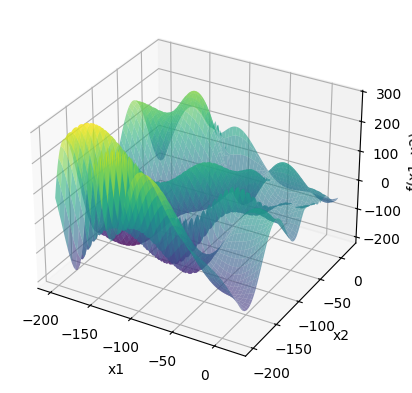

In [14]:
#min
def f(x):
  x1, x2 = x
  return -(x2 + 47) * np.sin(np.sqrt(abs(x1/2 + (x2 + 47)))) - x1 * np.sin(np.sqrt(abs(x1 - (x2 + 47))))

# Define the bounds
bounds = [(-200, 20), (-200, 20)]

# Define the initial guess
x_initial = np.array([1, 1])

# Hill Climbing
best_solution_hc, best_value_hc = hill_climbing(f, bounds, x_initial)

# Busca Local Aleatória
best_solution_lrs, best_value_lrs = local_random_search(f, bounds)

# Busca Aleatória Global
best_solution_grs, best_value_grs = global_random_search(f, bounds)

print("Imprimindo Solução unitária: ")
print("Hill Climbing:", best_solution_hc, round(best_value_hc, 3))
print("Local Random Search:", best_solution_lrs, round(best_value_lrs, 3))
print("Global Random Search:", best_solution_grs, round(best_value_grs, 3))
print("\n")
print("Realizando testes com 100 iterações...")
print("\n")
run_experiment(f, bounds, x_initial)

plot_3d_function(f, bounds)